In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import lasio

In [2]:
df = lasio.read("data/15-9-19_SR_COMP.las").df()
df.dropna(inplace=True)

In [3]:
df

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940
...,...,...,...,...,...,...,...
4617.3116,40.0000,6.0000,2.5547,87.1958,15.4080,2.6787,2.1338
4617.4640,40.0000,6.0000,2.5662,90.9071,15.8777,2.6239,2.0865
4617.6164,40.0000,6.0000,2.5702,86.2190,15.8576,2.5898,2.0461


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'DEPT':'DEPTH'}, inplace=True)
df.head()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


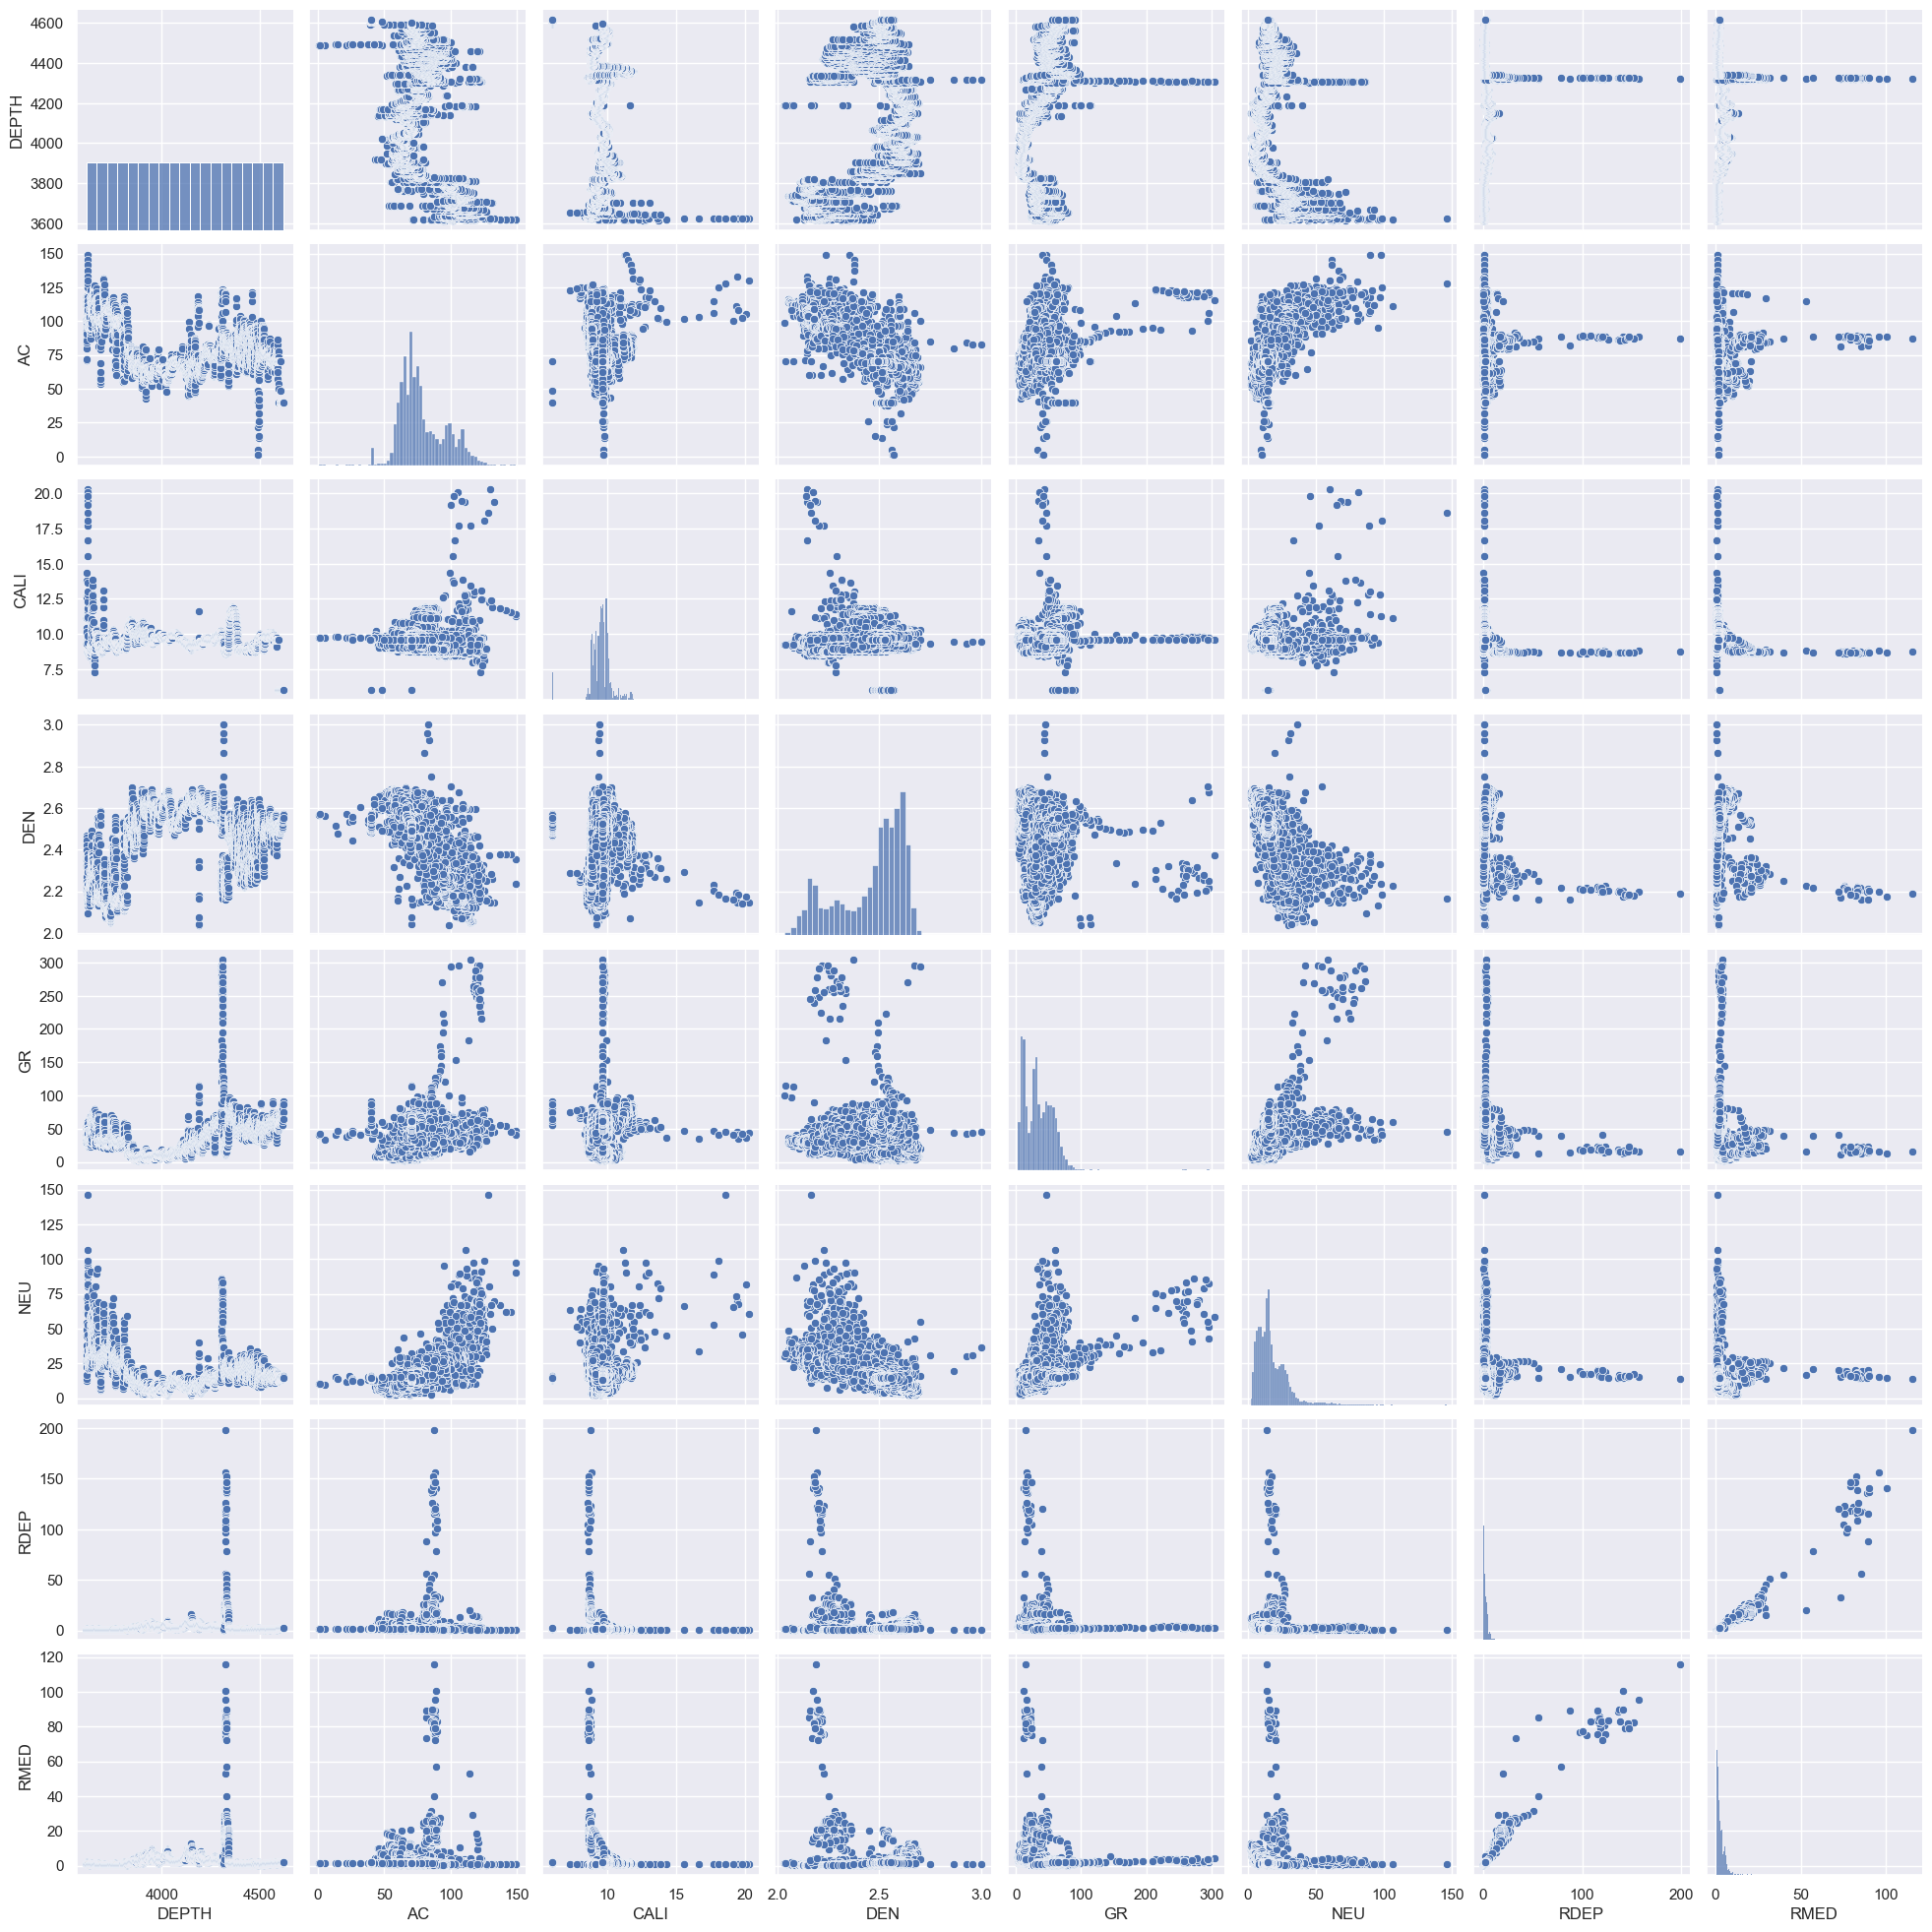

In [5]:
sns.pairplot(data=df)

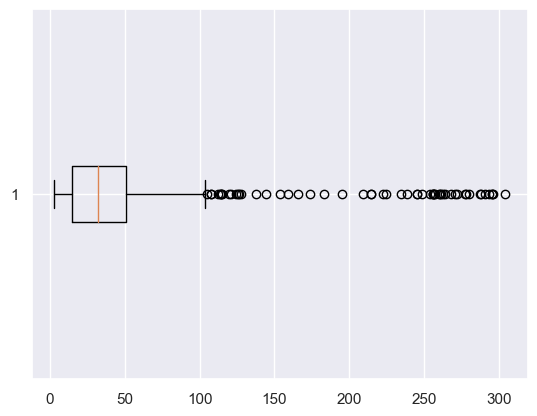

In [6]:
#Using matplotlib to make a boxplot
plt.boxplot(x=df['GR'], vert=False)
plt.show()

### Styling the Boxplot

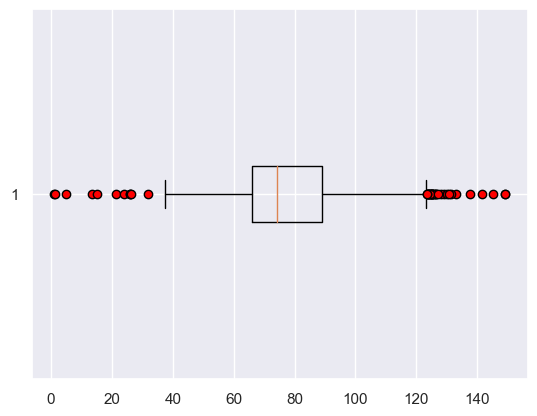

In [7]:
#Changing the outlier markers
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['AC'], vert=False, flierprops=red_circle)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

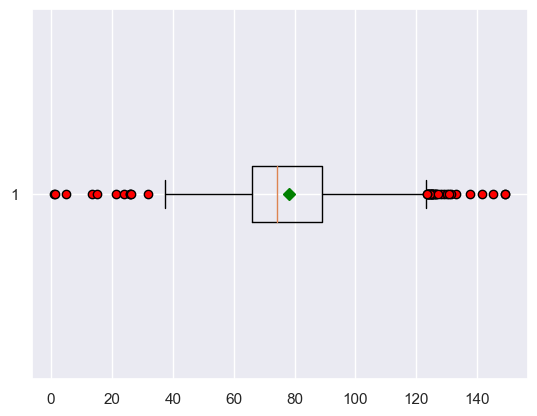

In [8]:
#Adding the mean
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['AC'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape)
plt.show

### Displaying Multiple Boxplots on a Figure

In [9]:
df = df[['AC','CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED']]

<Axes: >

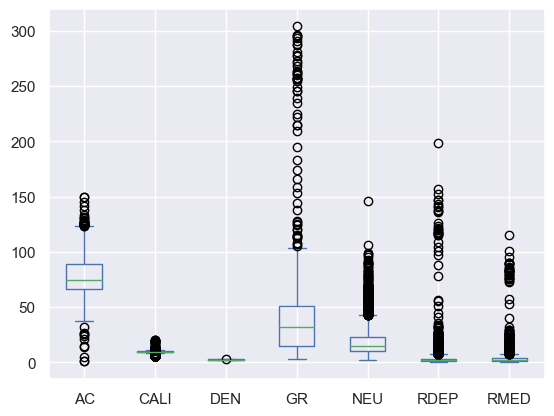

In [10]:
#Displaying all columns in the dataframe on a single figure
df.plot(kind='box')

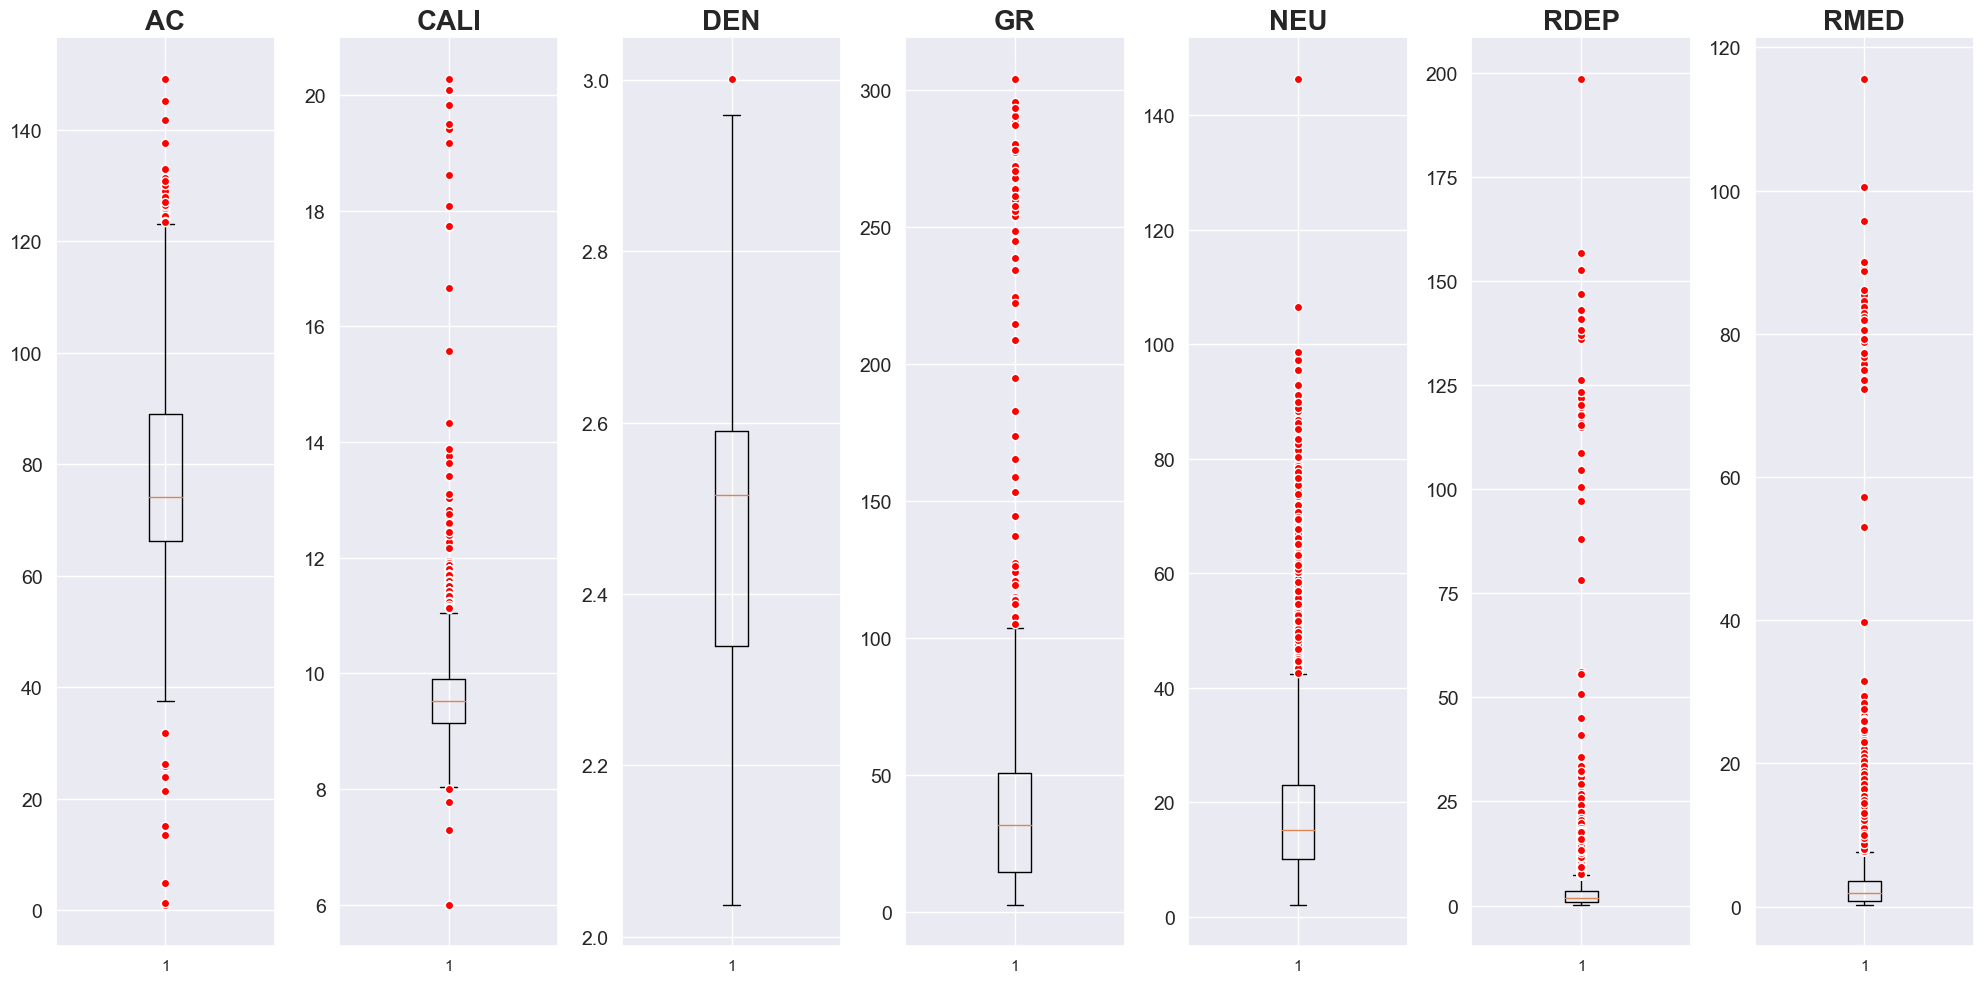

In [20]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

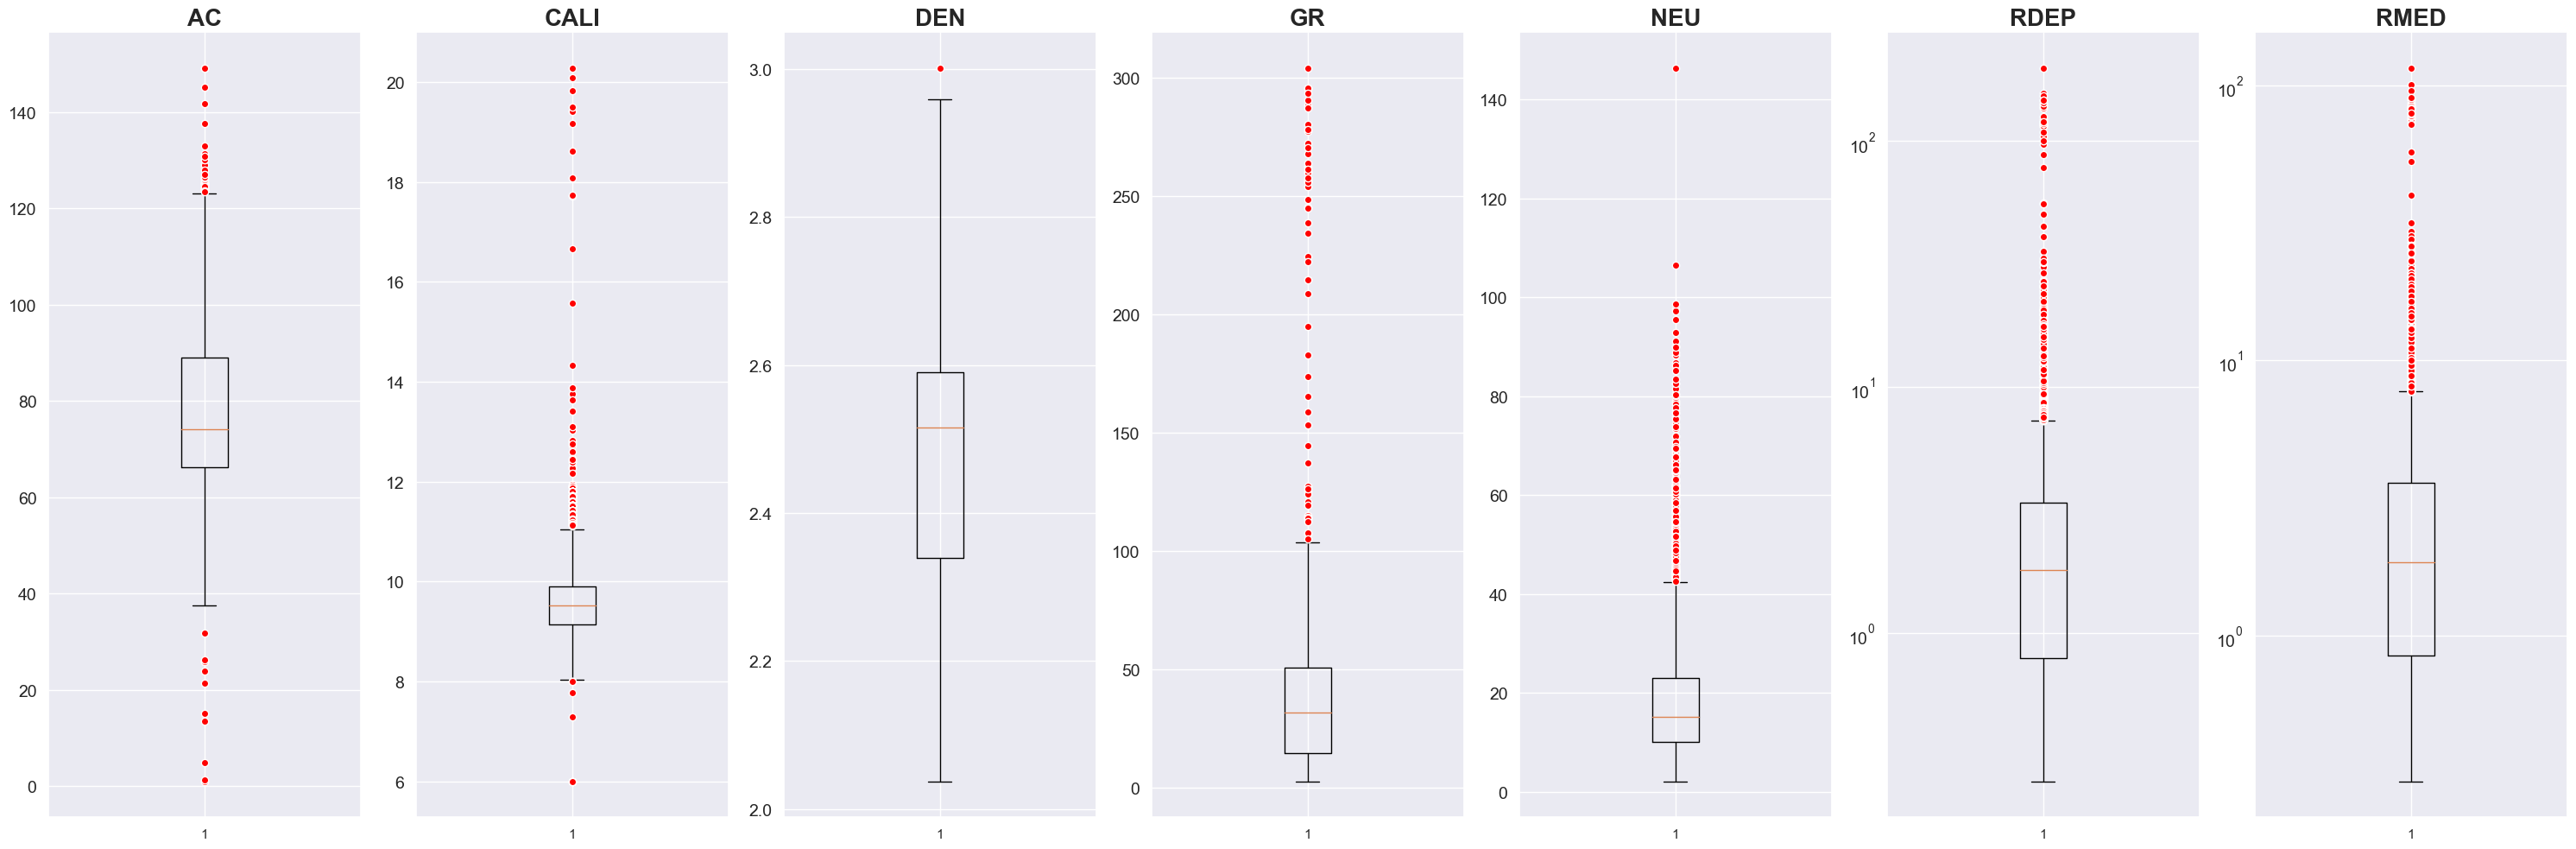

In [21]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    #Checking if column names are equal to columns we expect to be logarithmic
    if df.columns[i] == 'RDEP' or df.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()